# TItianic Dataset Case
### Describing the survivors of Titanic accident based on the available data

## Data Read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic = pd.read_csv("C:/Users/gelarani/OneDrive - PT Telekomunikasi Selular/Documents/TELKOMSEL/CMBM Division - HQ/2019/Others/DSA/11 Python Programming for data analytics III/Home Work Titianic/train.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Null data checking

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Correlation

In [5]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Data Information

### Checking Survival

,survived,passangers
0,0,549
1,1,342


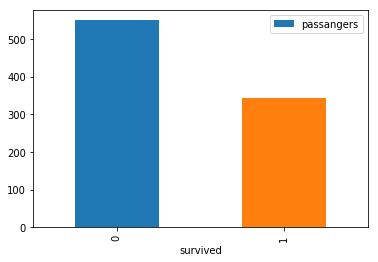

In [6]:
survive = titanic.Survived.value_counts().reset_index(name='passangers')
survive = survive.rename(columns={'index':'survived'})
survive.plot.bar(x='survived', y='passangers')

survive

#### From total 891 passanger, only 342 survived 

### Survived Passenger Category

In [7]:
## By Gender
survive_gender = titanic.groupby(['Sex', 'Survived'])['PassengerId']\
.nunique().reset_index(name='unique_psgt')
survive_gender

,Sex,Survived,unique_psgt
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


### By Gender

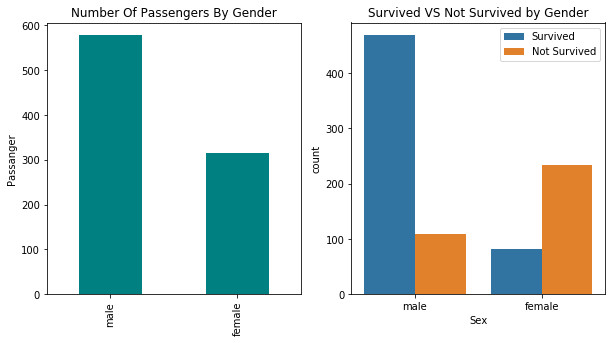

In [8]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
titanic["Sex"].value_counts().plot.bar(color = "teal", ax = ax[0])
ax[0].set_title("Number Of Passengers By Gender")
ax[0].set_ylabel("Passanger")
sns.countplot("Sex", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Survived VS Not Survived by Gender")
plt.legend(['Survived','Not Survived'])
plt.savefig('survivedbygender.png')
plt.show()

#### By gender, female passanger survived by 233 people higher than male passanger that only survived by 109 people.

### By Class

In [9]:
## By Class
survive_class = titanic.groupby(['Survived', 'Pclass'])['PassengerId']\
.nunique().reset_index(name='unique_psgt')
survive_class


,Survived,Pclass,unique_psgt
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


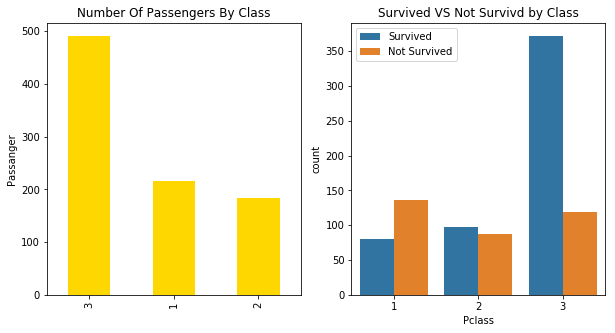

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
titanic["Pclass"].value_counts().plot.bar(color = "gold", ax = ax[0])
ax[0].set_title("Number Of Passengers By Class")
ax[0].set_ylabel("Passanger")
sns.countplot("Pclass", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Survived VS Not Survivd by Class")
plt.legend(['Survived','Not Survived'])
plt.savefig('survivedbyclass.png')
plt.show()

#### Passannger on Class 1 was the most survived passanger by 136 people

### By Age

In [11]:
# Average Age that survive by gender

survive_age = titanic.groupby(['Sex', 'Survived'])['Age'].mean().reset_index(name='Average Age')

survive_age

,Sex,Survived,Average Age
0,female,0,25.046875
1,female,1,28.847716
2,male,0,31.618056
3,male,1,27.276022


#### Average age female survive was 28 yrs old, while for male was 27 yrs old

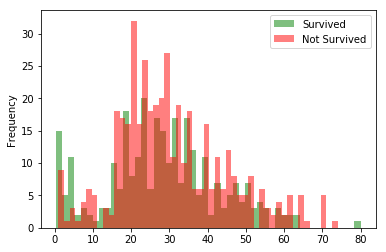

In [13]:
survived = titanic[titanic["Survived"] == 1]
died = titanic[titanic["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='green',bins=50)
died["Age"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Not Survived'])
plt.savefig('survivedbyage.png')
plt.show()

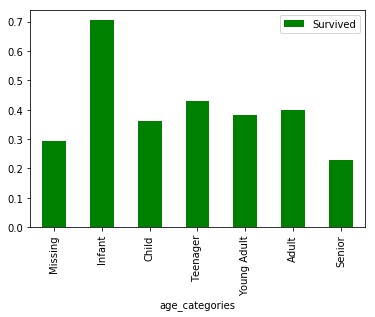

In [17]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

titanic = process_age(titanic,cut_points,label_names)

age_cat_pivot = titanic.pivot_table(index="age_categories",values="Survived")
age_cat_pivot.plot.bar(color='green')
plt.savefig('survivedbyage_category.png')
plt.show()




#### Group age of Inftant (Under 5 yrs old) was the most survived passanger